# Titanic Competition

First, just take a look at what the data looks like.

In [78]:
import pandas as pd
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Output some summary statistics for continuous variables.

In [79]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Look at the distributions of continuous variables.

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

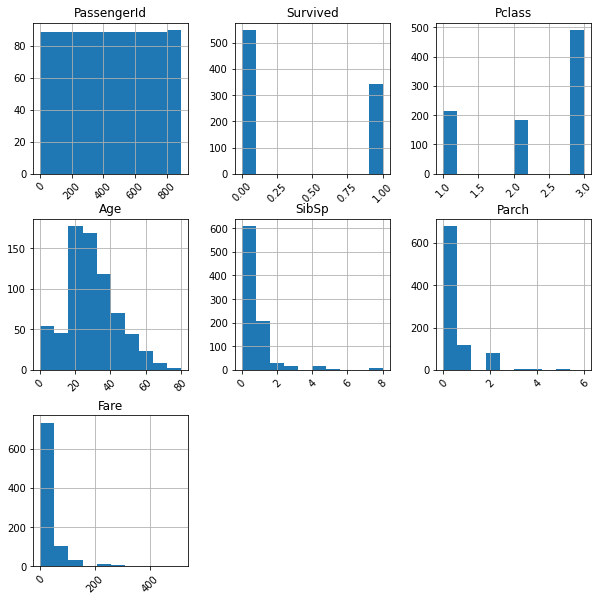

In [80]:
#matplotlib inline
data.hist(figsize=(10,10), xrot=45)

Let's look at how some of the variables are correlated. Passenger class and fare appear to be most highly correlated with survival rate. These might make for sensible variables in our model. As expected passenger Id has effectively no correlation with survival rates as it is just a unique identifier. Surprisingly, age doesn't appear correlated with survival rates. Parch and SibSp also have no correlation with survival rate. We might not want to include these latter variables in our analysis.

<AxesSubplot:>

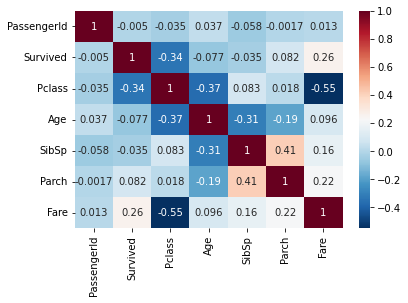

In [81]:
#matplotlib inline
import seaborn as sns
corrs = data.corr()
sns.heatmap(corrs, cmap='RdBu_r', annot=True)

It appears that some variables are likely categorical rather than continuous so we recast them as object types. Also add in a variable for whether the passenger had a cabin.

In [96]:
data['Pclass'] = data.Pclass.astype('object')
data['SibSp'] = data.SibSp.astype('object')
data['Parch'] = data.Parch.astype('object')
data['HasCabin'] = data.Cabin != data.Cabin
data['HasCabin'] = data.HasCabin.astype('object')

Looking at the statistics for the categorical variables shows that SibSp and Parch are mostly 0s for 2/3 of variables.We might not want to include these in our model. Variables that are proxies for unique IDs like name, ticket number and cabin number might not be suitable for our modelling.

In [97]:
data.describe(include='object')

,Pclass,Name,Sex,SibSp,Parch,Ticket,Cabin,Embarked,HasCabin
count,891,891,891,891,891,891,204,889,891
unique,3,891,2,7,7,681,147,3,2
top,3,"Braund, Mr. Owen Harris",male,0,0,347082,B96 B98,S,True
freq,491,1,577,608,678,7,4,644,687


Here we try to visualise how different categorical variables impact survival rate. Plots show that passengers in 3rd class were unlikely to survive. Sex also appears to have a significant impact on survival. SibSp and Parch of 0 were more likely to have died than survived but the bar heights look representative of the bulk probability of 549/891 (=0.61). The bulk of passengers also have SibSp and Parch of 0. Similar arguments could be made for where passengers embarked.

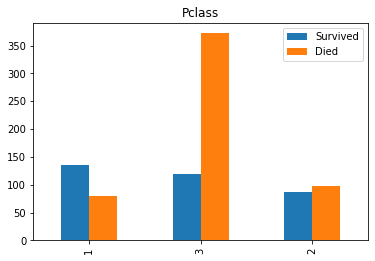

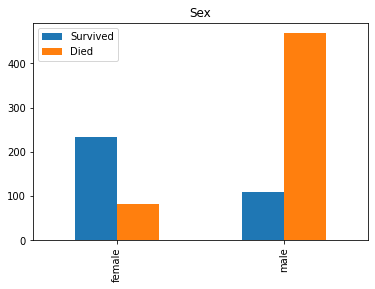

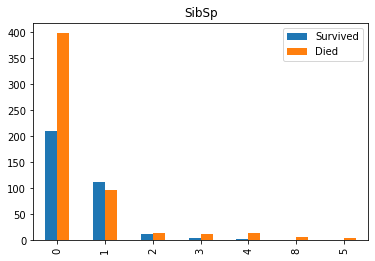

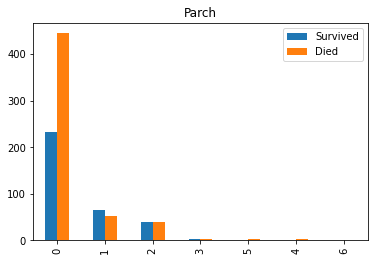

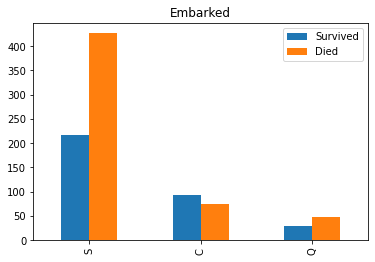

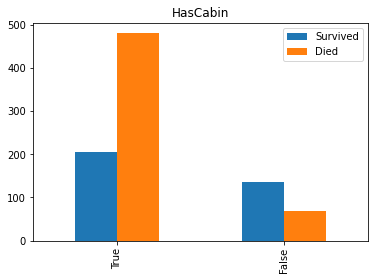

In [98]:
#matplotlib inline
import matplotlib.pyplot as plt
for column in data.select_dtypes(include='object'):
    if data[column].nunique() < 10:
        plotData = pd.concat([data[(data.Survived == 1)][column].value_counts().rename("Survived"),
                      data[(data.Survived == 0)][column].value_counts().rename("Died")],axis=1)
        plotData.plot(kind="bar")
        plt.title(column)

We then get summary statistics to inspect this in more detail and compare the survival rates to bulk value of 0.39 whilst also being mindful of how many passengers this category might apply to. Not having a cabin seems to increase the rate of survival.

In [100]:
for column in data.select_dtypes(include='object'):
    if data[column].nunique() < 10:
        display(data.groupby(column).mean())

,PassengerId,Survived,Age,Fare
Pclass,,,,
1,461.597222,0.629630,38.233441,84.154687
2,445.956522,0.472826,29.877630,20.662183
3,439.154786,0.242363,25.140620,13.675550


,PassengerId,Survived,Age,Fare
Sex,,,,
female,431.028662,0.742038,27.915709,44.479818
male,454.147314,0.188908,30.726645,25.523893


,PassengerId,Survived,Age,Fare
SibSp,,,,
0,455.370066,0.345395,31.397558,25.692028
1,439.727273,0.535885,30.089727,44.147370
2,412.428571,0.464286,22.620000,51.753718
3,321.562500,0.250000,13.916667,68.908862
4,381.611111,0.166667,7.055556,31.855556
5,336.800000,0.000000,10.200000,46.900000
8,481.714286,0.000000,NaN,69.550000


,PassengerId,Survived,Age,Fare
Parch,,,,
0,445.255162,0.343658,32.178503,25.586774
1,465.110169,0.550847,24.422000,46.778180
2,416.662500,0.500000,17.216912,64.337604
3,579.200000,0.600000,33.200000,25.951660
4,384.000000,0.000000,44.500000,84.968750
5,435.200000,0.200000,39.200000,32.550000
6,679.000000,0.000000,43.000000,46.900000


,PassengerId,Survived,Age,Fare
Embarked,,,,
C,445.357143,0.553571,30.814769,59.954144
Q,417.896104,0.389610,28.089286,13.276030
S,449.527950,0.336957,29.445397,27.079812


,PassengerId,Survived,Age,Fare
HasCabin,,,,
False,455.401961,0.666667,35.829297,76.141504
True,443.208151,0.299854,27.555293,19.157325


# Conclusions
- Pclass or fare should be included in our modelling. We shouldn't include both as these variables are correlated.
- Sex and whether the passenger has a cabin number should also be included in our modelling.
- The sensitivity of our modelling to inclusion of SibSp, Parch and where the passenger embarked should also be included.